### Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings("ignore")

In [6]:
viridis = sns.color_palette("viridis", 10)
viridis

[(0.283072, 0.130895, 0.449241),
 (0.262138, 0.242286, 0.520837),
 (0.220057, 0.343307, 0.549413),
 (0.177423, 0.437527, 0.557565),
 (0.143343, 0.522773, 0.556295),
 (0.119512, 0.607464, 0.540218),
 (0.166383, 0.690856, 0.496502),
 (0.319809, 0.770914, 0.411152),
 (0.525776, 0.833491, 0.288127),
 (0.762373, 0.876424, 0.137064)]

### Temperature data

In [7]:
summer_temp_data_pupation_period = pd.read_csv('../data/pupations/pupal_period_temperatures_summer.csv')
fall_temp_data_pupation_period = pd.read_csv('../data/pupations/pupal_period_temperatures_fall.csv')
summer_temp_data_eclosion_period = pd.read_csv('../data/eclosions/eclosion_temperatures_summer.csv')
fall_temp_data_eclosion_period = pd.read_csv('../data/eclosions/eclosion_temperatures_fall.csv')

In [8]:
#eclosion period data needs to be truncated at day 29 because over overlap with pupation data
summer_temp_data_eclosion_period = summer_temp_data_eclosion_period[summer_temp_data_eclosion_period['day'] >= 29]
#data also needs to be re-aligned with pupation period
summer_temp_data_eclosion_period['day_from_start'] = summer_temp_data_eclosion_period['day_from_start'] + 12

#combine dataframes
summer_temp_data_total = pd.concat([summer_temp_data_pupation_period, summer_temp_data_eclosion_period], ignore_index=True)
#truncate at 30 days
summer_temp_data_total = summer_temp_data_total[summer_temp_data_total['day_from_start'] <= 30]

#eclosion data need to be truncated to data 69 because of overlap with pupation data
fall_temp_data_eclosion_period = fall_temp_data_eclosion_period[fall_temp_data_eclosion_period['day'] >= 69]
#combine dataframes
fall_temp_data_total = pd.concat([fall_temp_data_pupation_period, fall_temp_data_eclosion_period], ignore_index=True)



### Load pupation data

In [9]:
#load data
pupation_curve_data_total = pd.read_csv('../data/pupations/pupation_curves_data_by_plant.tsv', sep='\t')

#remove excess values from summer
summer_pupation_curve_data_total = pupation_curve_data_total
summer_pupation_curve_data_total = summer_pupation_curve_data_total.iloc[0:45]

summer_pupation_curve_data_total = pupation_curve_data_total

#remove excess values from summer
summer_pupation_curve_data_total_bound = summer_pupation_curve_data_total
summer_pupation_curve_data_total_bound = summer_pupation_curve_data_total_bound.iloc[0:20]

### Load eclosion data

In [10]:
#load data
eclosions_curve_data = pd.read_csv('../data/eclosions/eclosion_curves_by_plant.tsv', sep='\t')

#remove excess values from summer
summer_eclosions_curve_data = eclosions_curve_data
summer_eclosions_curve_data = summer_eclosions_curve_data.iloc[0:15]

### Plot

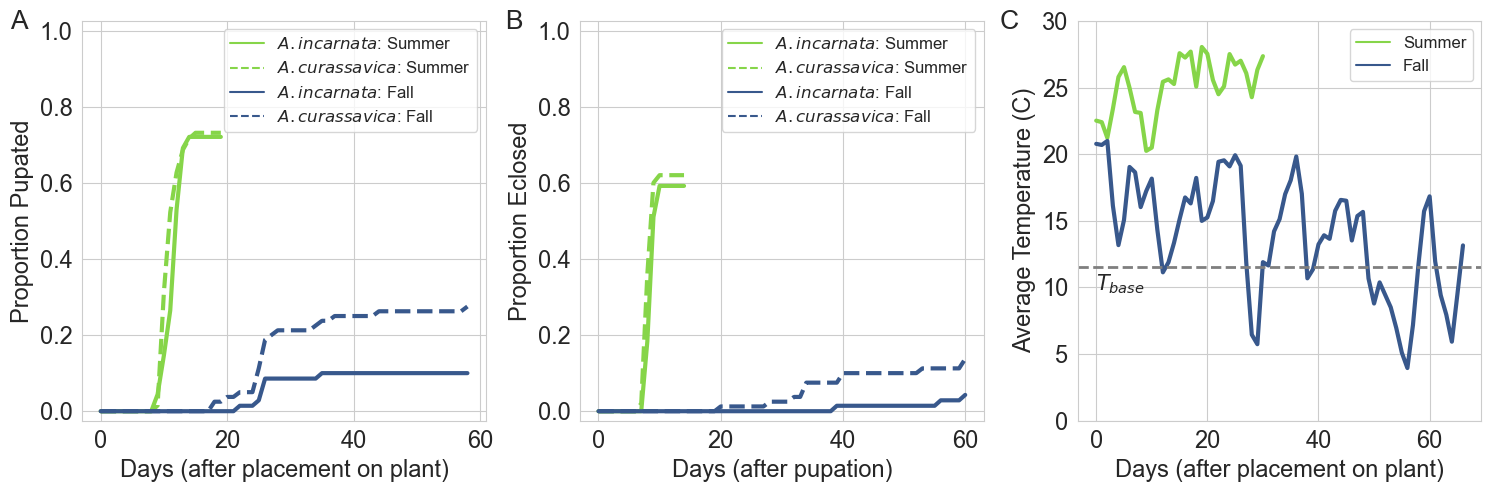

In [12]:
sns.set_style('whitegrid')
fig, [ax1,ax2,ax3] = plt.subplots(1, 3, figsize=(15, 5))

#temperature data
#summer
#pupation temperature data
sns.lineplot(data=summer_temp_data_total, x='day_from_start', y='average_temperature',
             linewidth=3, ax=ax3, alpha=1, color=viridis[8])


#pupation temperature data
sns.lineplot(data=fall_temp_data_total, x='day_from_start', y='average_temperature',
             linewidth=3, ax=ax3, alpha=1, color=viridis[2])


ax3.set_ylim(0, 30)
ax3.set_xlabel('Days (after placement on plant)', fontsize=17)
ax3.set_ylabel('Average Temperature (C)', fontsize=17)
ax3.tick_params(axis='x', labelsize=17)
ax3.tick_params(axis='y', labelsize=17)

ax3.axhline(y=11.5, color='tab:gray', linestyle='--', linewidth=2)

#make legend
legend_labels = ['Summer', 'Fall']

legend_handles = []
for label in legend_labels:
    line_color = viridis[8] if 'Summer' in label else viridis[2]
    line = plt.Line2D([0], [0], color=line_color, linestyle='-', label=label)
    legend_handles.append(line)
    
# Add the custom legend to the specific axes (ax)
ax3.legend(handles=legend_handles, fontsize=12, loc='upper right')

ax3.text(x=0, y=9.75, s=r'$T_{base}$', fontsize=15)

# PUPATIONS
#summer
#inc
sns.lineplot(data=summer_pupation_curve_data_total_bound, x='days_post_on_plant', y='proportion_of_total_individuals_summer_inc', 
             ax=ax1, color=viridis[8], linewidth=3, alpha=1)
#cur
sns.lineplot(data=summer_pupation_curve_data_total_bound, x='days_post_on_plant', y='proportion_of_total_individuals_summer_cur', 
             ax=ax1, color=viridis[8], linewidth=3, linestyle='--', alpha=1)

#fall
#inc
sns.lineplot(data=pupation_curve_data_total, x='days_post_on_plant', y='proportion_of_total_individuals_fall_inc', 
             ax=ax1, color=viridis[2], linewidth=3, alpha=1)
#cur
sns.lineplot(data=pupation_curve_data_total, x='days_post_on_plant', y='proportion_of_total_individuals_fall_cur', 
             ax=ax1, color=viridis[2], linewidth=3, linestyle='--', alpha=1)

ax1.set_ylim(-0.025,1.025)
ax1.set_xlabel('Days (after placement on plant)', fontsize=17)
ax1.set_ylabel('Proportion Pupated', fontsize=17)
ax1.tick_params(axis='x', labelsize=17)
ax1.tick_params(axis='y', labelsize=17)

#make legend
legend_labels = [r'${A. incarnata}$: Summer', r'${A. curassavica}$: Summer', 
                 r'${A. incarnata}$: Fall', r'${A. curassavica}$: Fall']
legend_handles = []
for label in legend_labels:
    line_color = viridis[8] if 'Summer' in label else viridis[2]
    line_style = '-' if 'A. incarnata' in label else '--'
    line = plt.Line2D([0], [0], color=line_color, linestyle=line_style, label=label)
    legend_handles.append(line)
    
# Add the custom legend to the specific axes (ax)
ax1.legend(handles=legend_handles, fontsize=12, loc='upper right')

# ECLOSIONS

#summer
#inc
sns.lineplot(data=summer_eclosions_curve_data, x='days_post_pupation', y='proportion_of_total_individuals_summer_inc', 
             ax=ax2, color=viridis[8], linewidth=3, alpha=1)
#cur
sns.lineplot(data=summer_eclosions_curve_data, x='days_post_pupation', y='proportion_of_total_individuals_summer_cur', 
             ax=ax2, color=viridis[8], linewidth=3, linestyle='--', alpha=1)

#fall
#inc
sns.lineplot(data=eclosions_curve_data, x='days_post_pupation', y='proportion_of_total_individuals_fall_inc', 
             ax=ax2, color=viridis[2], linewidth=3, alpha=1)
#cur
sns.lineplot(data=eclosions_curve_data, x='days_post_pupation', y='proportion_of_total_individuals_fall_cur', 
             ax=ax2, color=viridis[2], linewidth=3, linestyle='--', alpha=1)

ax2.set_ylim(-0.025,1.025)
ax2.set_xlabel('Days (after pupation)', fontsize=17)
ax2.set_ylabel('Proportion Eclosed', fontsize=17)
ax2.tick_params(axis='x', labelsize=17)
ax2.tick_params(axis='y', labelsize=17)

#make legend
legend_labels = [r'${A. incarnata}$: Summer', r'${A. curassavica}$: Summer', 
                 r'${A. incarnata}$: Fall', r'${A. curassavica}$: Fall']
legend_handles = []
for label in legend_labels:
    line_color = viridis[8] if 'Summer' in label else viridis[2]
    line_style = '-' if 'A. incarnata' in label else '--'
    line = plt.Line2D([0], [0], color=line_color, linestyle=line_style, label=label)
    legend_handles.append(line)
    
# Add the custom legend to the specific axes (ax)
ax2.legend(handles=legend_handles, fontsize=12, loc='upper right')

fig.text(0.015, 0.95, 'A', fontsize=19, va='center', ha='center')
fig.text(0.345, 0.95, 'B', fontsize=19, va='center', ha='center')
fig.text(0.675, 0.95, 'C', fontsize=19, va='center', ha='center')

plt.tight_layout()
plt.savefig('../figures/primary/progression_curves.pdf')
plt.savefig('../figures/primary/progression_curves.png', dpi=600)